## 回帰分析演習：需要予測

このデータは、ある月の日別の休日有無、降雨有無、気温、および特定のサービスや商品の需要量を示しています。データ分析やモデル構築にあたり、これらの要素が需要にどのように影響を与えるかを検討することができます。

* day: 日付（8月1日から8月31日まで）
* holiday: 休日かどうかを示すフラグ（1: 休日、0: 平日）
* rain: 雨が降ったかを示すフラグ（1: 雨、0: 雨なし）
* temperature: 平均気温
* demand: 需要量

### GPT プロンプト : データのインポート
* demand_prediction.csvをデータフレームとして取り込む
* データフレーム名はdfとする
* データフレームdfを表示する
* Pythonコード

In [1]:
# データフレームdfを読み込むためのコード
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv('demand_prediction.csv')

# データフレームdfを表示
df


,day,holiday,rain,temperature,demand
0,8/1,1,0,30.6,644
1,8/2,1,0,32.5,728
2,8/3,0,0,30.9,586
3,8/4,0,0,24.5,492
4,8/5,0,1,26.7,440
5,8/6,0,0,33.7,620
6,8/7,0,0,33.2,596
7,8/8,1,0,33.6,638
8,8/9,1,1,25.2,498
9,8/10,0,1,30.7,547


### GPT プロンプト : 基本統計量の算出

* day: 日付（8月1日から8月31日まで）
* holiday: 休日かどうかを示すフラグ（1: 休日、0: 平日）
* rain: 雨が降ったかを示すフラグ（1: 雨、0: 雨なし）
* temperature: 平均気温
* demand: 需要量
* このデータ構造を使う
* データフレームdfの基本統計量を算出
* 基本統計量をcsvで保存
* 基本統計量をヒートマップで表示
* Pythonコード

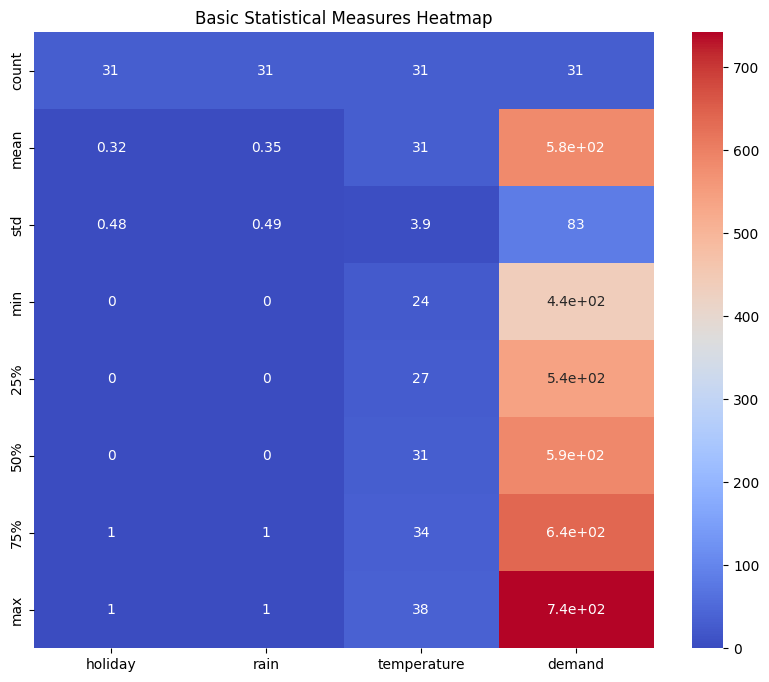

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 基本統計量の算出
stats = df.describe()

# 基本統計量をCSVファイルに保存
stats.to_csv('basic_statistics.csv')

# ヒートマップの表示
plt.figure(figsize=(10, 8))
sns.heatmap(stats, annot=True, cmap='coolwarm')
plt.title('Basic Statistical Measures Heatmap')
plt.show()

## 1. 基本統計量の算出：箱ひげ図

ボックスプロット（箱ひげ図）は、データの分布を視覚的に表現するための統計的グラフです。データの中央値、四分位範囲（データの広がりや散らばり具合）、外れ値を示すことができます。以下はボックスプロットの主な構成要素です：

1. **中央値（メディアン）**: データセットを二等分する値で、ボックスプロットの中央に横線で表示されます。
2. **四分位範囲（IQR: Interquartile Range）**: 下位25%（第1四分位数、Q1）と上位25%（第3四分位数、Q3）のデータの範囲を示します。この範囲はボックスの形で表され、データの中心的な50%を含みます。
3. **ボックス**: 第1四分位数から第3四分位数までの範囲を示し、データの中央50%がこの範囲に含まれます。
4. **ひげ（ホイスカー）**: ボックスの外に伸びる線で、通常、第1四分位数から1.5*IQRよりも低いデータ点と、第3四分位数から1.5*IQRよりも高いデータ点までを示します。これにより、データの全範囲（外れ値を除く）が視覚化されます。
5. **外れ値**: ひげの外にあるデータポイントで、通常は点で表されます。これらは、他のデータと比較して異常に高い値または低い値を持つデータポイントです。

ボックスプロットは、データセット内の異常値の検出、データの散らばり度合いの評価、そして異なるデータセットの中央値や分布の比較に特に有用です。データの分布形状（対称性や歪み）について直接的な情報は提供しませんが、データの要約として非常に役立ちます。

### GPT プロンプト : 箱ひげ図
* 数値カラムのボックスプロットを作成
* ボックスプロットの要約統計量をDataFrameに変換し、CSVファイルとして保存
* 各ボックスプロットには、それぞれのカラム名がタイトルとして表示
* boxplotは縦向き
* Pythonコード

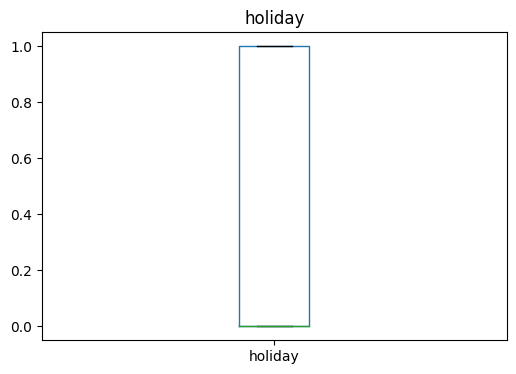

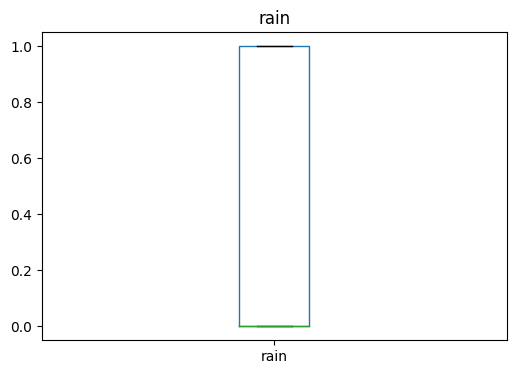

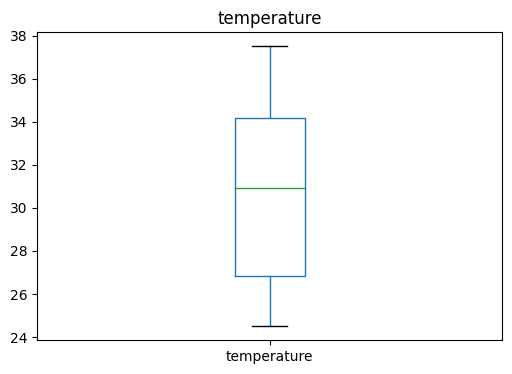

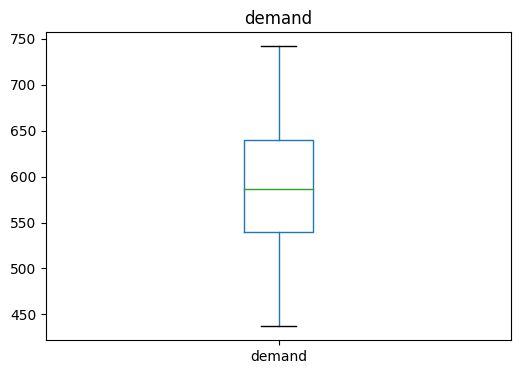

In [3]:
# 数値カラムのボックスプロットを作成し、要約統計量をDataFrameに変換
import pandas as pd
import numpy as np

# 数値カラムのみを選択
numeric_columns = df.select_dtypes(include=[np.number]).columns

# 要約統計量を格納するための空のDataFrameを作成
summary_df = pd.DataFrame()

# 各数値カラムに対してボックスプロットを作成し、要約統計量を計算
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=[col], vert=True)
    plt.title(col)
    plt.grid(False)
    plt.show()

    # 要約統計量をDataFrameに追加
    summary_df[col] = df[col].describe()

# 要約統計量のDataFrameを転置して、各カラムの統計量が列になるようにする
summary_df = summary_df.T

# 要約統計量のDataFrameをCSVファイルとして保存
summary_df.to_csv('boxplot_summary_statistics.csv')


## 2. データの可視化：ヒストグラム

### GPT プロンプト : ヒストグラム
* 全ての数値カラムのヒストグラムを作成
* グラフの行数は数値カラムで決める
* 各ヒストグラムには、それぞれのカラム名がタイトルとして表示
* ヒストグラムは縦向き
* Pythonコード

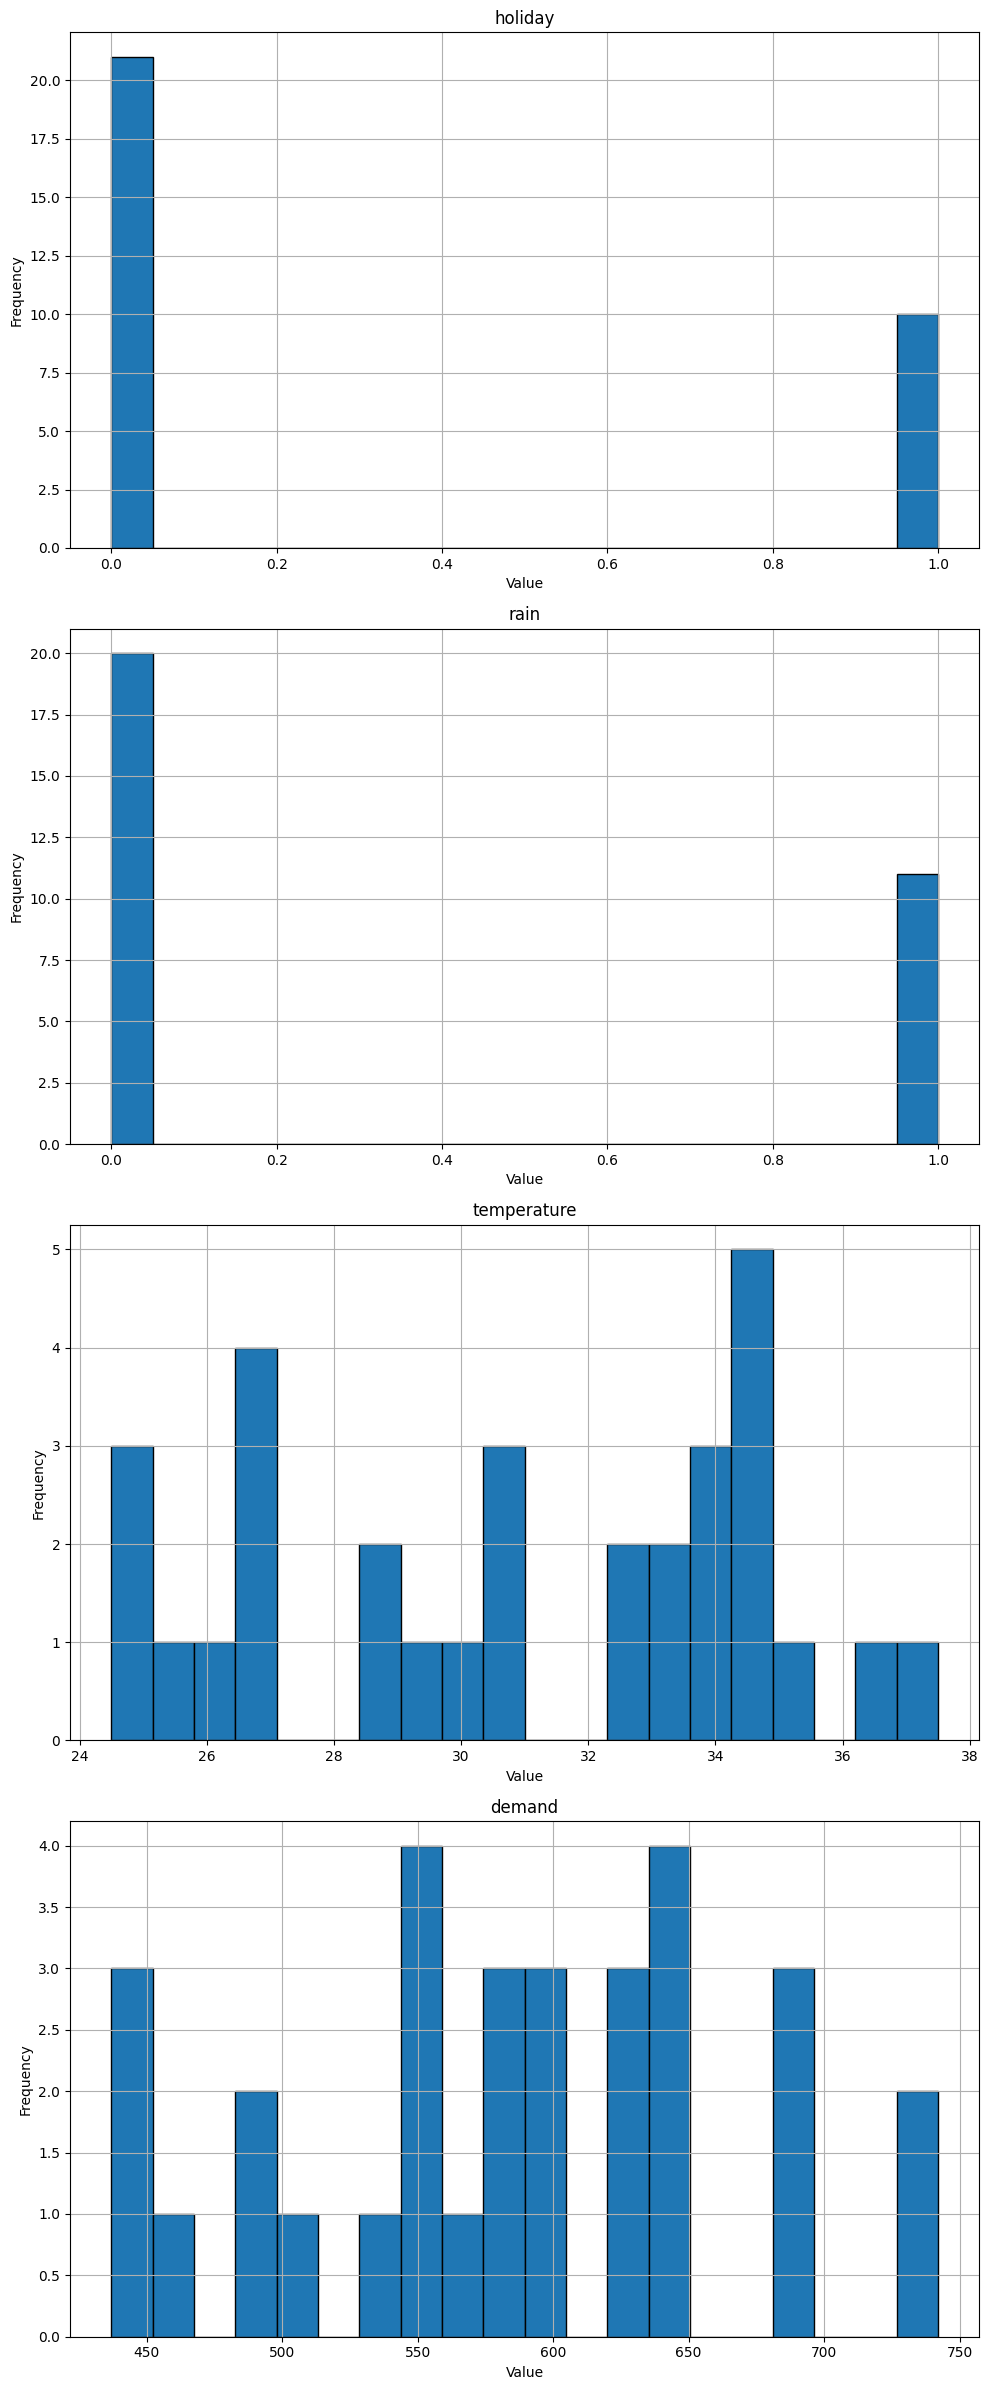

In [4]:
# 全ての数値カラムのヒストグラムを作成
num_cols = len(numeric_columns)
plt.figure(figsize=(10, 6 * num_cols))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_cols, 1, i)
    df[col].hist(bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 2. データの可視化：散布図

量的データと質的データの組み合わせを可視化するためのさまざまな方法を以下にまとめます。

1. **散布図（Scatter plot）**: 量 × 量
   - 量的変数と量的変数の関係を視覚化するのに適しています。
   - 例えば、身長（量的データ）と体重（量的データ）の関係を見ることができます。
   - 質的変数が2つの場合は、散布図の色分けやマーカーの形状を使って区別することができます。

2. **箱ひげ図（Boxplot）**: 質 × 量
   - 量的変数を質的変数でグループ分けして、各グループの分布を比較するのに適しています。
   - 例えば、都道府県（質的データ）ごとに病院数（量的データ）の分布を比較することができます。

3. **クロス集計表（Cross-tabulation）**: 質 × 質
   - 2つの質的変数の関係をまとめた表です。各セルにはそれぞれの組み合わせに対応するデータの個数が表示されます。
   - 例えば、性別（質的データ）と好きなスポーツ（質的データ）の関係を示すことができます。

4. **グループ化された棒グラフ（Grouped bar chart）**: 積み上げグラフ
   - 2つの質的変数の組み合わせによる量的変数の平均値などの統計量を視覚化するのに適しています。
   - 例えば、都道府県（質的データ）ごとに男女の平均身長（量的データ）を比較することができます。

5. **バブルチャート（Bubble chart）**:
   - 2つの量的変数と1つの質的変数を組み合わせて可視化するのに使用されます。
   - 例えば、都道府県（質的データ）ごとの人口（量的データ）、平均所得（量的データ）をバブルの大きさや色で表現することができます。

これらの方法を使用することで、量的データと質的データの組み合わせによるパターンや関係を効果的に可視化することができます。

### GPT プロンプト : 散布図
* 全ての数値カラムの組み合わせで散布図を作成
* seabornのライブラリを使い、マトリックス表示
* 回帰直線も描く
* Pythonコード

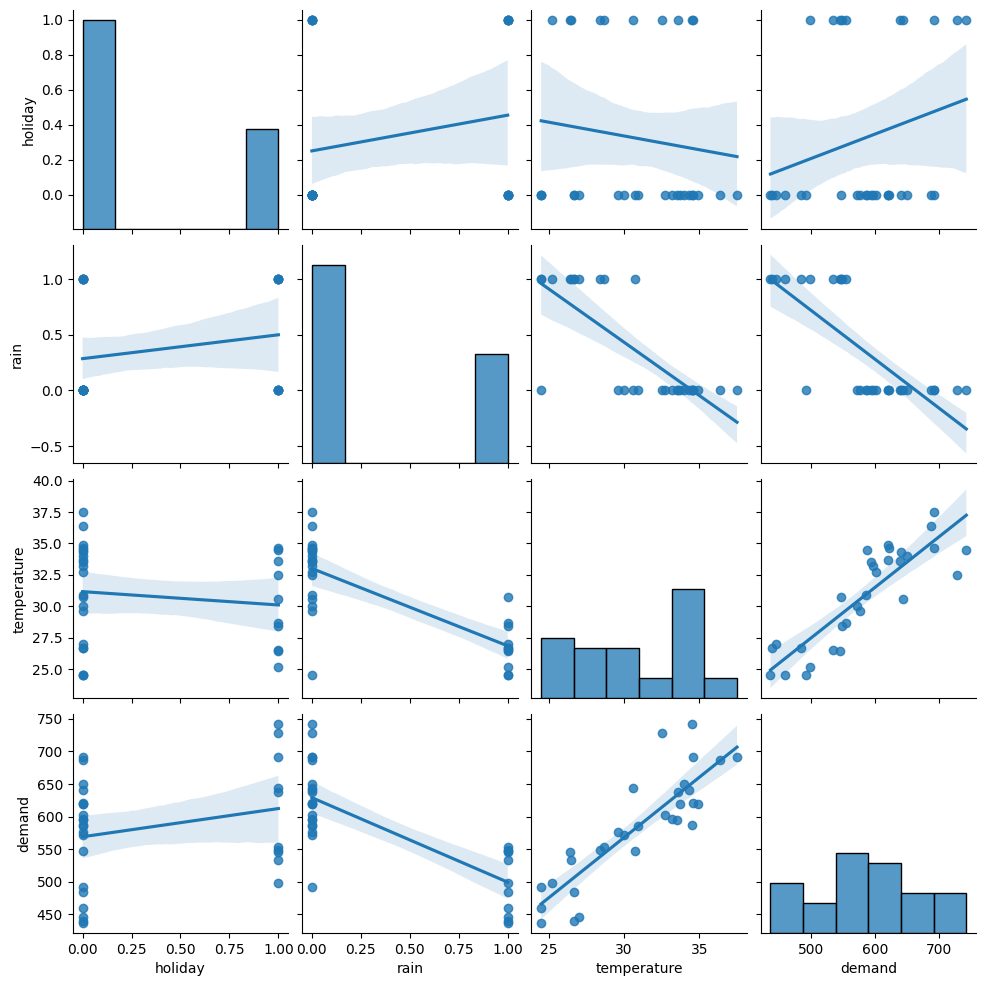

In [5]:
import seaborn as sns

# seabornのpairplotを使用して数値カラムの組み合わせで散布図マトリックスを作成
# kind="reg"により回帰直線も描く
sns.pairplot(df[numeric_columns], kind="reg")
plt.show()


### GPT プロンプト : boxplot
* 質的データ(holiday, rain)と数値カラムの組み合わせでboxplotを作成
* Pythonコード

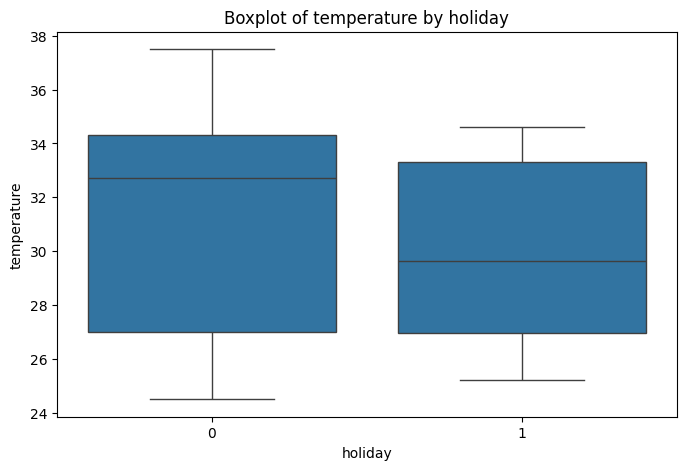

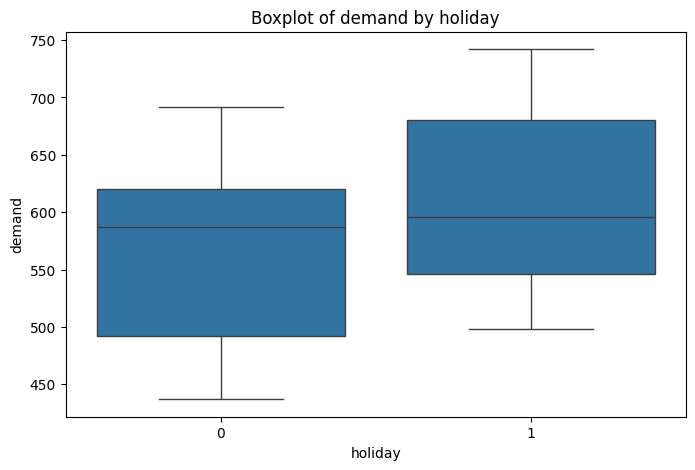

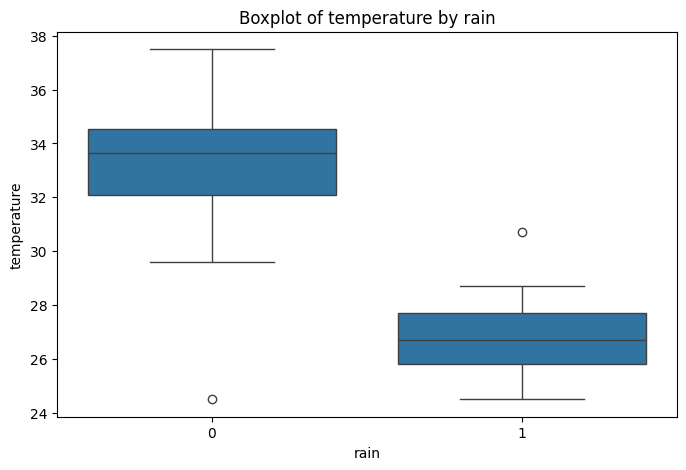

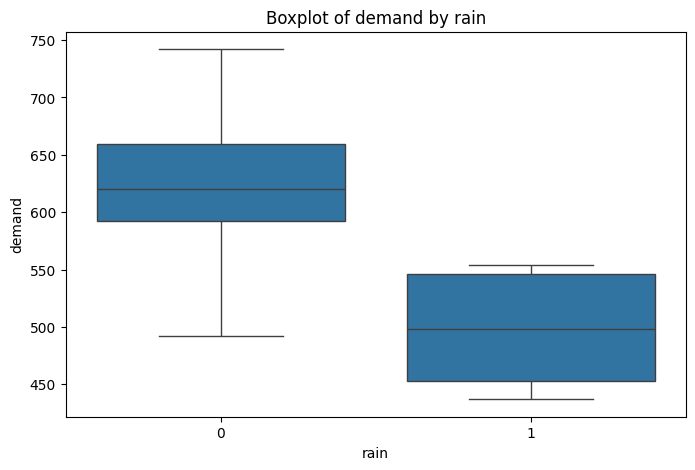

In [6]:
# 質的データと数値カラムの組み合わせでboxplotを作成
num_cols = ['temperature', 'demand']  # 数値カラム
cat_cols = ['holiday', 'rain']  # 質的データ

# 各質的データカラムに対して、数値カラムのボックスプロットを作成
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f'Boxplot of {num} by {cat}')
        plt.show()


### GPT プロンプト : クロス表
* 質的データ(holiday, rain)でクロス表を作成
* ヒートマップで表示
* Pythonコード

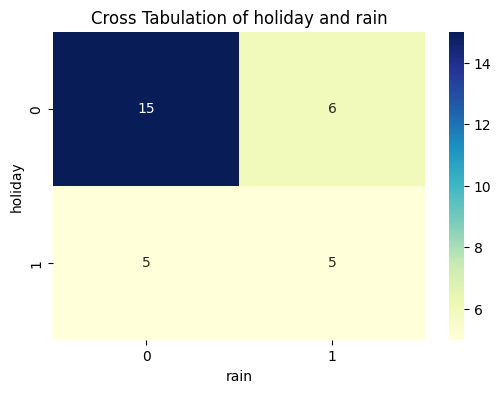

In [7]:
# 質的データでクロス表を作成
cross_tab = pd.crosstab(df['holiday'], df['rain'])

# クロス表をヒートマップで表示
plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Cross Tabulation of holiday and rain')
plt.ylabel('holiday')
plt.xlabel('rain')
plt.show()


## 2. データの可視化：相関係数行列

### GPT プロンプト : 相関係数行列
* 全ての数値カラムの組み合わせで相関係数行列を作成
* ヒートマップで表示
* Pythonコード

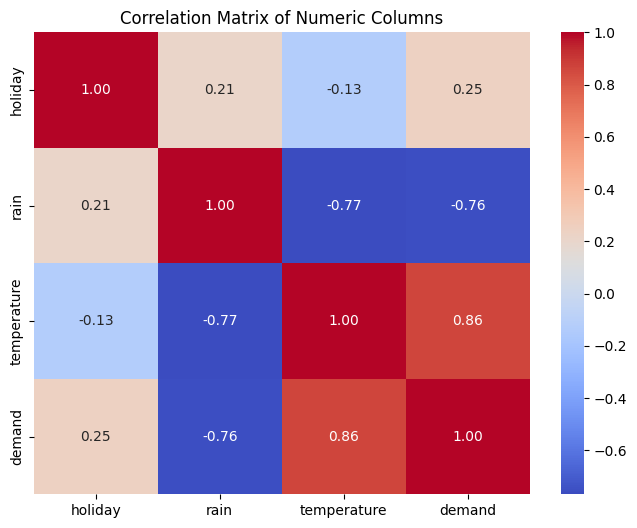

In [8]:
# 数値カラムの相関係数行列を作成
correlation_matrix = df[numeric_columns].corr()

# 相関係数行列のヒートマップを表示
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


## 3. 回帰分析

このコードは、与えられたデータフレーム内の複数の目的変数に対して、線形回帰モデルを構築し、その性能を評価するための手順を実行します。具体的な手順は以下の通りです：

1. **データの準備**: 元のデータフレームをコピーし、目的変数のリストを取得します。

2. **ループ処理**: 各目的変数に対してループを行います。

3. **相関が高い説明変数の削除**: 目的変数との相関が高い説明変数同士のうち、目的変数との相関が小さい方を削除します。これにより、多重共線性の影響を軽減し、モデルの解釈性を向上させます。

4. **説明変数と目的変数の準備**: 残った説明変数と目的変数を準備します。

5. **訓練データとテストデータの分割**: データを訓練データとテストデータに分割します。

6. **線形回帰モデルの構築と学習**: 訓練データを用いて線形回帰モデルを構築し、学習させます。

7. **予測値の計算**: テストデータを用いて目的変数の予測値を計算します。

8. **評価指標の計算**: 予測値と実際の値の比較を通じて、モデルの性能を評価します。ここではR^2値が使用されます。

9. **グラフの描画**: 実際の値と予測値の散布図を描画し、モデルの予測性能を視覚化します。

10. **係数と切片の表示**: 使用されている説明変数とその係数、切片を表示し、モデルの構造を解釈します。

11. **グラフの整理**: 不要な部分を削除して、グラフのレイアウトを整えます。

以上の手順を通じて、複数の目的変数に対する線形回帰モデルの構築と評価が行われます。

### GPT プロンプト
* データフレームdfを利用する。
* 回帰式を、需要(demand) = a + b * holiday + c * rain + d * (temperature -30 )で実施
* 説明変数として 'holiday', 'rain', 'temperature' を選択し、目的変数として 'demand' を選択する。
* statsmodelを利用して、重回帰分析を行う
* 統計的な要約を表示する。
* 予測値と実際の需要を含む 'predicted_demand' 列をデータフレームに追加し、実際の需要と予測された需要の比較を行う。
* 実際の需要(demand)と予測された需要(predicted_demand)の比較グラフ
* 予測値と実際の値の誤差を計算し、日付を横軸にしてプロットする(残差プロット)。
* 実際の需要と予測された需要の散布図をプロットし、完全な予測を示す対角線を含めるグラフ
* AIC（赤池情報量基準）、決定係数$R^2$ 、および自由度修正済み決定係数$R^2_{adj}$ の値を表示
* RMSEを表示
* Pythonコード

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     106.5
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           4.45e-15
Time:                        06:28:42   Log-Likelihood:                -141.07
No. Observations:                  31   AIC:                             290.1
Df Residuals:                      27   BIC:                             295.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         568.8022      7.990     71.185      

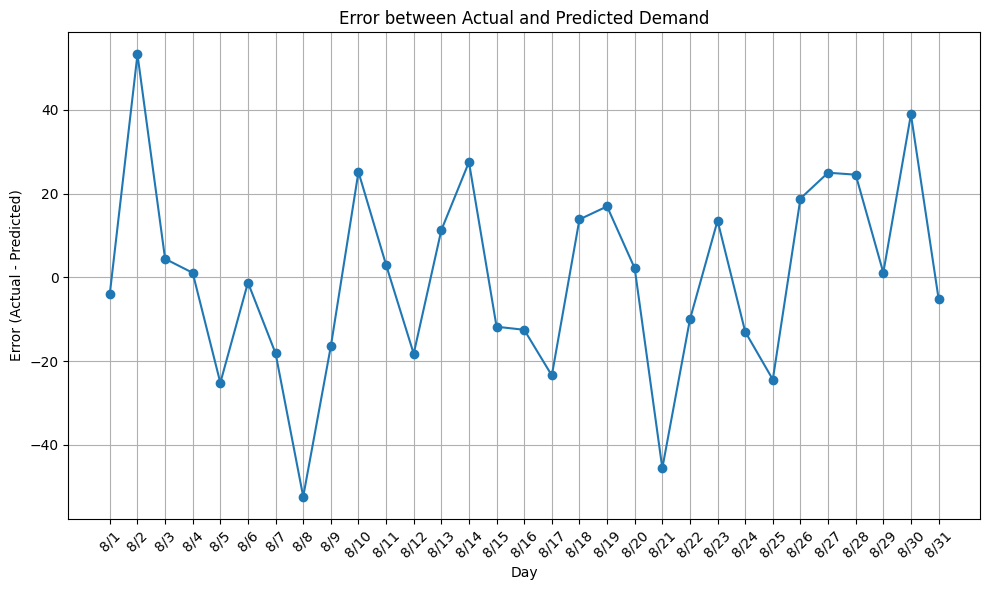

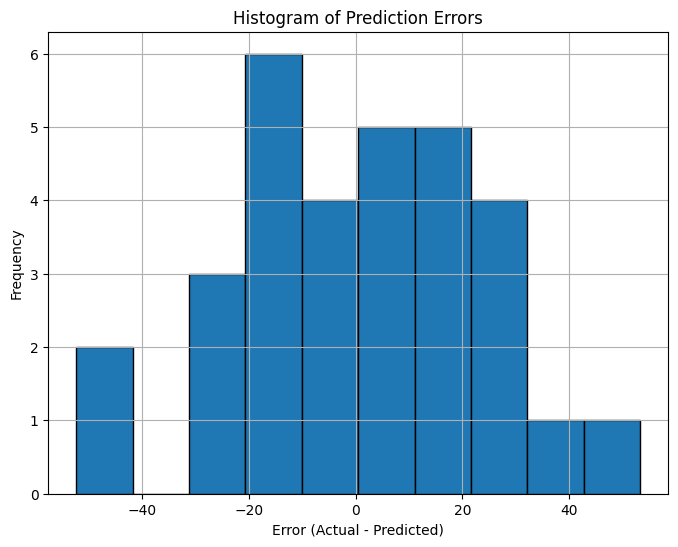

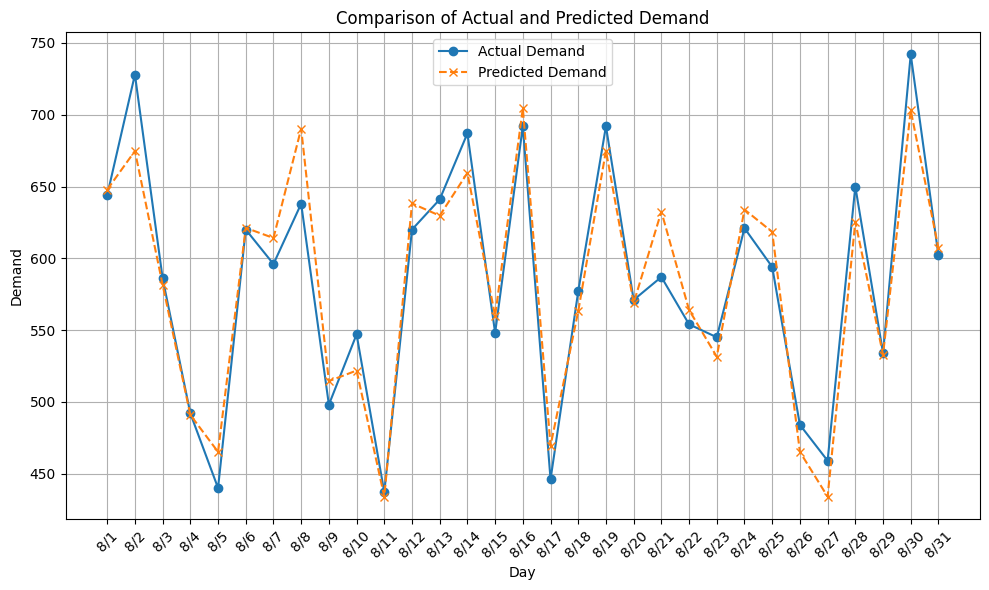

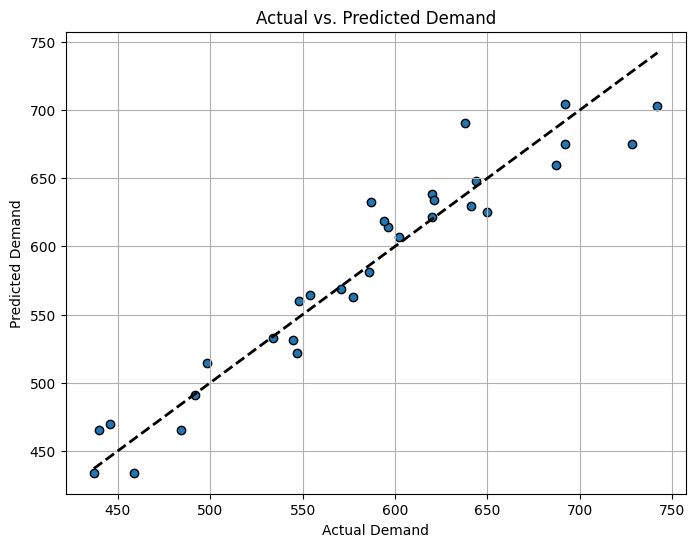

AIC: 290.14227630928764
R-squared: 0.92210178918205
Adjusted R-squared: 0.9134464324245
RMSE: 22.91


In [9]:
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error


# 重回帰分析を再実施
# 温度から30を引く処理を再度実行
X = df[['holiday', 'rain', 'temperature']].copy()
X['temperature'] = X['temperature'] - 30
y = df['demand']

# 定数項を追加
X_with_const = sm.add_constant(X)

# モデルの構築
model = sm.OLS(y, X_with_const).fit()

# 統計的な要約を表示
print(model.summary())

# 予測値を計算し、データフレームに追加
df['predicted_demand'] = model.predict(X_with_const)

# 予測値と実際の値の誤差を計算し、プロットする
df['error'] = df['demand'] - df['predicted_demand']

plt.figure(figsize=(10, 6))
plt.plot(df['day'], df['error'], marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Error (Actual - Predicted)')
plt.title('Error between Actual and Predicted Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 誤差のヒストグラムを描く
plt.figure(figsize=(8, 6))
plt.hist(df['error'], bins=10, edgecolor='black')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()

# 実際の需要と予測された需要をプロットするためのグラフ
plt.figure(figsize=(10, 6))
plt.plot(df['day'], df['demand'], marker='o', linestyle='-', label='Actual Demand')
plt.plot(df['day'], df['predicted_demand'], marker='x', linestyle='--', label='Predicted Demand')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.title('Comparison of Actual and Predicted Demand')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 実際の値と予測値の散布図をプロットし、完全な予測を示す対角線を描く
plt.figure(figsize=(8, 6))
plt.scatter(df['demand'], df['predicted_demand'], edgecolor='black')
plt.plot([df['demand'].min(), df['demand'].max()], [df['demand'].min(), df['demand'].max()], 'k--', lw=2)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs. Predicted Demand')
plt.grid(True)
plt.show()

print(f"AIC: {model.aic}")
print(f"R-squared: {model.rsquared}")
print(f"Adjusted R-squared: {model.rsquared_adj}")

# RMSEの計算
rmse = sqrt(mean_squared_error(df['demand'], df['predicted_demand']))
print(f"RMSE: {rmse:.2f}")



### GPT プロンプト
* この回帰モデルを関数化
* 簡単な例で予測を行う
* Pythonコード

In [10]:
def predict_demand(holiday, rain, temperature):
    """
    予測モデルを使用して需要を予測する関数。

    Parameters:
    - holiday: 休日かどうか（1: 休日、0: 平日）
    - rain: 雨が降ったかどうか（1: 雨、0: 雨なし）
    - temperature: 気温（摂氏）

    Returns:
    - predicted_demand: 予測された需要
    """
    # 温度から30を引く
    temperature_adjusted = temperature - 30
    # 予測用のデータフレームを作成
    X_new = pd.DataFrame({'const': 1, 'holiday': [holiday], 'rain': [rain], 'temperature': [temperature_adjusted]})
    # 需要を予測
    predicted_demand = model.predict(X_new)
    return predicted_demand.iloc[0]

# 例: 休日で雨が降り、気温が35度の場合の需要を予測
predicted_demand_example = predict_demand(holiday=1, rain=1, temperature=35)
print(f"Predicted Demand: {predicted_demand_example:.2f}")


Predicted Demand: 653.25


### Stepwise法での説明変数選択

### GPT プロンプト
* データフレームdfを用いて線形回帰を実施
* 目的変数はdemand
* 説明変数はtarget以外の数値カラムを候補とする
* statsmodelを利用する
* AICを基準としたstepwise法により、説明変数を選択する
* AICの推移を可視化する
* 交差検証法(cv=5)で精度確認をする
* 予測値と実際の需要を含む 'stepwise_demand' 列をデータフレームに追加し、実際の需要と予測された需要の比較を行う。
* 実際の需要(demand)と予測された需要(stepwise_demand)の比較グラフ
* 予測値と実際の値の誤差を計算し、日付を横軸にしてプロットする(残差プロット)。
* 実際の需要と予測された需要の散布図をプロットし、完全な予測を示す対角線を含めるグラフ
* AIC（赤池情報量基準）、決定係数$R^2$ 、および自由度修正済み決定係数$R^2_{adj}$、RMSEの値を表示
* Pythonコード

Add  temperature                    with p-value 3.57392e-10
Add  holiday                        with p-value 7.38994e-06
Add  rain                           with p-value 0.000586533
                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     106.5
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           4.45e-15
Time:                        06:28:45   Log-Likelihood:                -141.07
No. Observations:                  31   AIC:                             290.1
Df Residuals:                      27   BIC:                             295.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    s

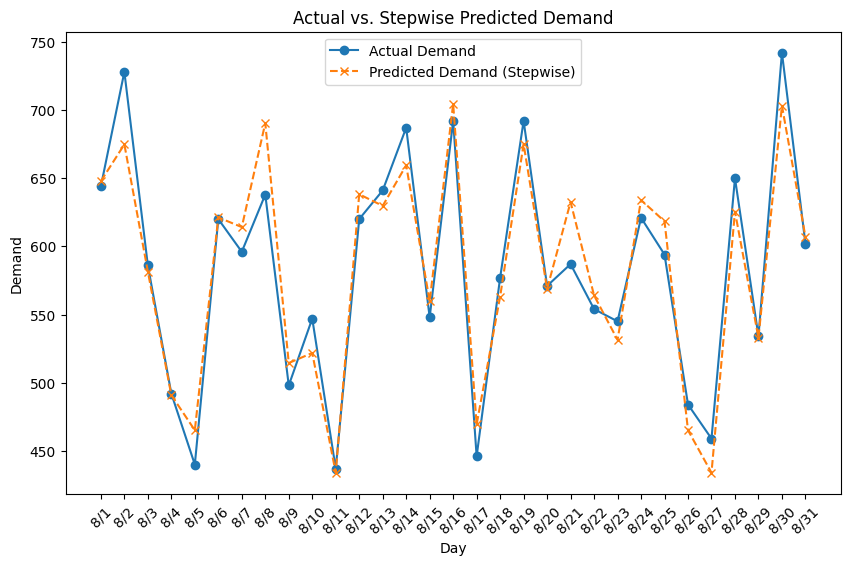

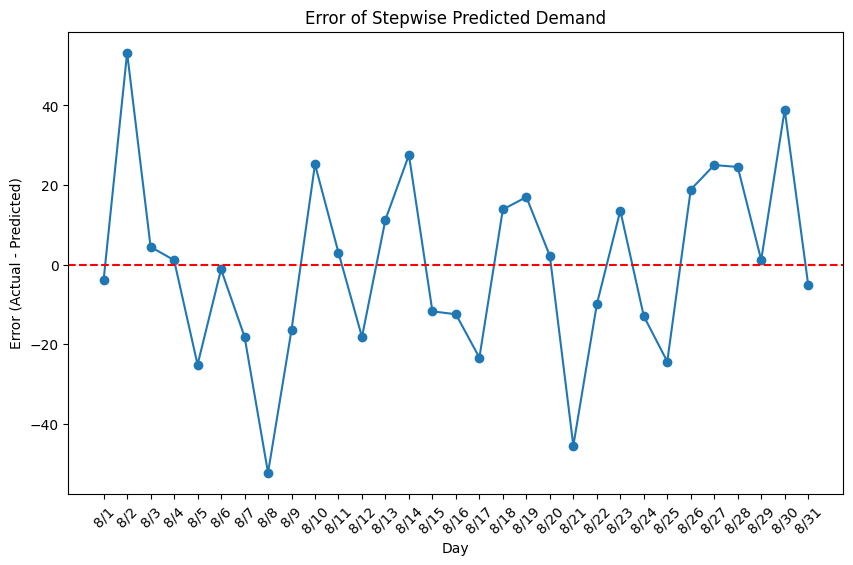

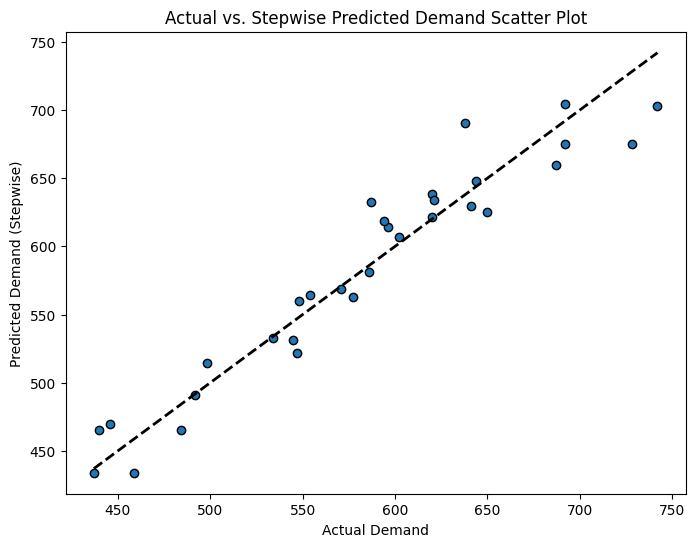

Stepwise RMSE: 22.91


In [11]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# ステップワイズ選択の関数（AICを基準）
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# 説明変数（数値カラム）と目的変数を定義
X = df[['holiday', 'rain', 'temperature']]
y = df['demand']

# ステップワイズ選択を実行
selected_variables = stepwise_selection(X, y)

# 選択された変数を使用してモデルを構築
X_selected = sm.add_constant(df[selected_variables])
model = sm.OLS(y, X_selected).fit()

# 統計的な要約を表示
print(model.summary())

# 交差検証を使用した精度確認
kf = KFold(n_splits=5, shuffle=True, random_state=1)
rmse_scores = []

for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_cv = sm.OLS(y_train, X_train).fit()
    y_pred_cv = model_cv.predict(X_test)
    rmse_score = sqrt(mean_squared_error(y_test, y_pred_cv))
    rmse_scores.append(rmse_score)

average_rmse = sum(rmse_scores) / len(rmse_scores)
print(f"Average RMSE: {average_rmse:.2f}")


# 予測値を計算し、データフレームに追加
df['stepwise_demand'] = model.predict(X_selected)

# 実際の需要と予測された需要の比較グラフ
plt.figure(figsize=(10, 6))
plt.plot(df['day'], df['demand'], label='Actual Demand', marker='o')
plt.plot(df['day'], df['stepwise_demand'], label='Predicted Demand (Stepwise)', linestyle='--', marker='x')
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Demand')
plt.title('Actual vs. Stepwise Predicted Demand')
plt.legend()
plt.show()

# 予測値と実際の値の誤差（残差プロット）
df['stepwise_error'] = df['demand'] - df['stepwise_demand']
plt.figure(figsize=(10, 6))
plt.plot(df['day'], df['stepwise_error'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Error (Actual - Predicted)')
plt.title('Error of Stepwise Predicted Demand')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 実際の需要と予測された需要の散布図
plt.figure(figsize=(8, 6))
plt.scatter(df['demand'], df['stepwise_demand'], edgecolor='black')
plt.plot([df['demand'].min(), df['demand'].max()], [df['demand'].min(), df['demand'].max()], 'k--', lw=2)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand (Stepwise)')
plt.title('Actual vs. Stepwise Predicted Demand Scatter Plot')
plt.show()

# RMSEの計算と表示
stepwise_rmse = sqrt(mean_squared_error(df['demand'], df['stepwise_demand']))
print(f"Stepwise RMSE: {stepwise_rmse:.2f}")

